# Data cleaning exploration

If you are reading this, great! We hoopefully have some good results!

EDIT: hehe nop, something is really wrong. Someone find it please
EDIT EDIT: hmm maybe it is right?
We start by loading the data and the requried libraries:

In [159]:
import pandas as pd 
import numpy as np
from scipy import stats #not used atm
import matplotlib.colors as mcolors

data = pd.read_csv("data/consumption_temp.csv")
colors = list(mcolors.TABLEAU_COLORS.values())


pd.set_option('display.max_rows', 200)  # Replace 10 with your desired limit

In [160]:
data.head(5) , data.describe() , data.shape

(                  time   location  consumption  temperature
 0  2022-04-07 21:00:00     bergen     1.113325         -0.3
 1  2022-04-07 21:00:00       oslo     4.092830          1.0
 2  2022-04-07 21:00:00  stavanger     2.057858          1.3
 3  2022-04-07 21:00:00     tromsø     1.246582         -3.9
 4  2022-04-07 21:00:00  trondheim     1.970098         -2.8,
         consumption   temperature
 count  49494.000000  49494.000000
 mean       3.509242      6.554019
 std        3.096356      7.630308
 min        0.000000    -17.299999
 25%        1.263256      1.000000
 50%        2.376530      6.800000
 75%        5.189000     12.100000
 max       18.045011     30.500000,
 (49494, 4))

Looking at some of the dataframe observations, we should have a timestamp for each hour of each location (We need to check for missing values at a later point). We also have the temprature for the time and location, as well as the corresponding consumption for that hour. 

For the summary, there is not much to comment on. Lastly, we have 49,5k observations.

In [161]:
locations = data["location"].unique()
print(locations)
min_date = data["time"].min()
max_date = data["time"].max()
print(min_date , max_date)
data.isna().sum()

['bergen' 'oslo' 'stavanger' 'tromsø' 'trondheim' 'helsingfors']
2022-04-07 21:00:00 2023-04-02 21:00:00


time           0
location       0
consumption    0
temperature    0
dtype: int64

C:\Users\marti\AppData\Local\Temp\ipykernel_6736\2473992523.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_group['date'] = filtered_group['time'].dt.date
C:\Users\marti\AppData\Local\Temp\ipykernel_6736\2473992523.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_group['date'] = filtered_group['time'].dt.date
C:\Users\marti\AppData\Local\Temp\ipykernel_6736\2473992523.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

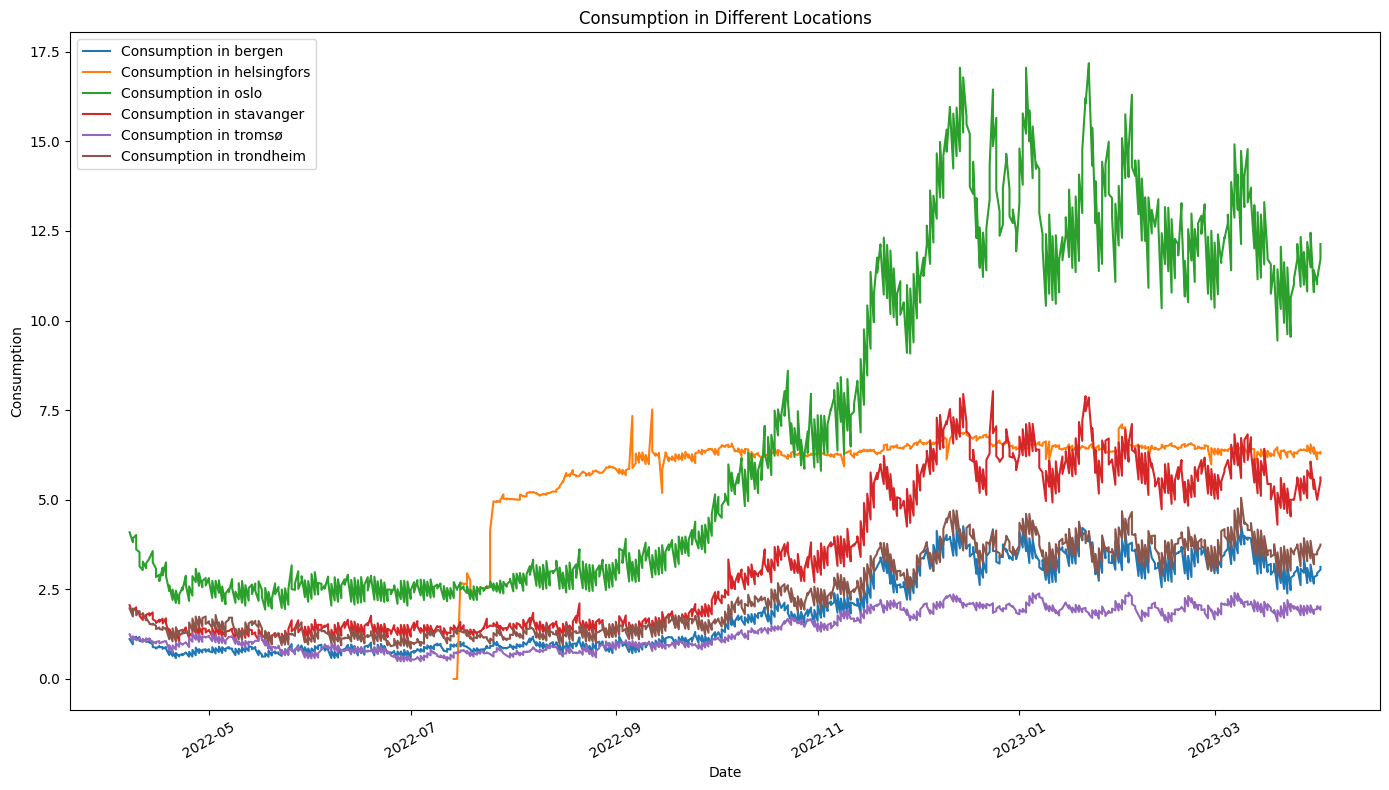

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the style to the default style
plt.style.use('default')

# Convert the 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Group the DataFrame by 'location'
grouped = data.groupby('location')

# Create a figure and axis
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Iterate through each group (city) and plot the data with specific colors
for i, (location, group) in enumerate(grouped):
    # Filter the data to include every 4th observation
    filtered_group = group.iloc[::12]
    
    # Extract the date component from the 'time' column
    filtered_group['date'] = filtered_group['time'].dt.date

    # Plot consumption data with the specific color for this location
    ax.plot(filtered_group['date'], filtered_group['consumption'], label=f'Consumption in {location}', color=colors[i])
    ax.set_xlabel('Date')
    ax.set_ylabel('Consumption')
    ax.set_title('Consumption in Different Locations')

# Set a custom tick frequency for the x-axis (e.g., every 4th label)
ax.tick_params(axis='x', rotation=30)

# Add a legend to distinguish lines by location
plt.legend()

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot with all locations
plt.show()


C:\Users\marti\AppData\Local\Temp\ipykernel_6736\3149146219.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_group['date'] = filtered_group['time'].dt.date
C:\Users\marti\AppData\Local\Temp\ipykernel_6736\3149146219.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_group['date'] = filtered_group['time'].dt.date
C:\Users\marti\AppData\Local\Temp\ipykernel_6736\3149146219.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

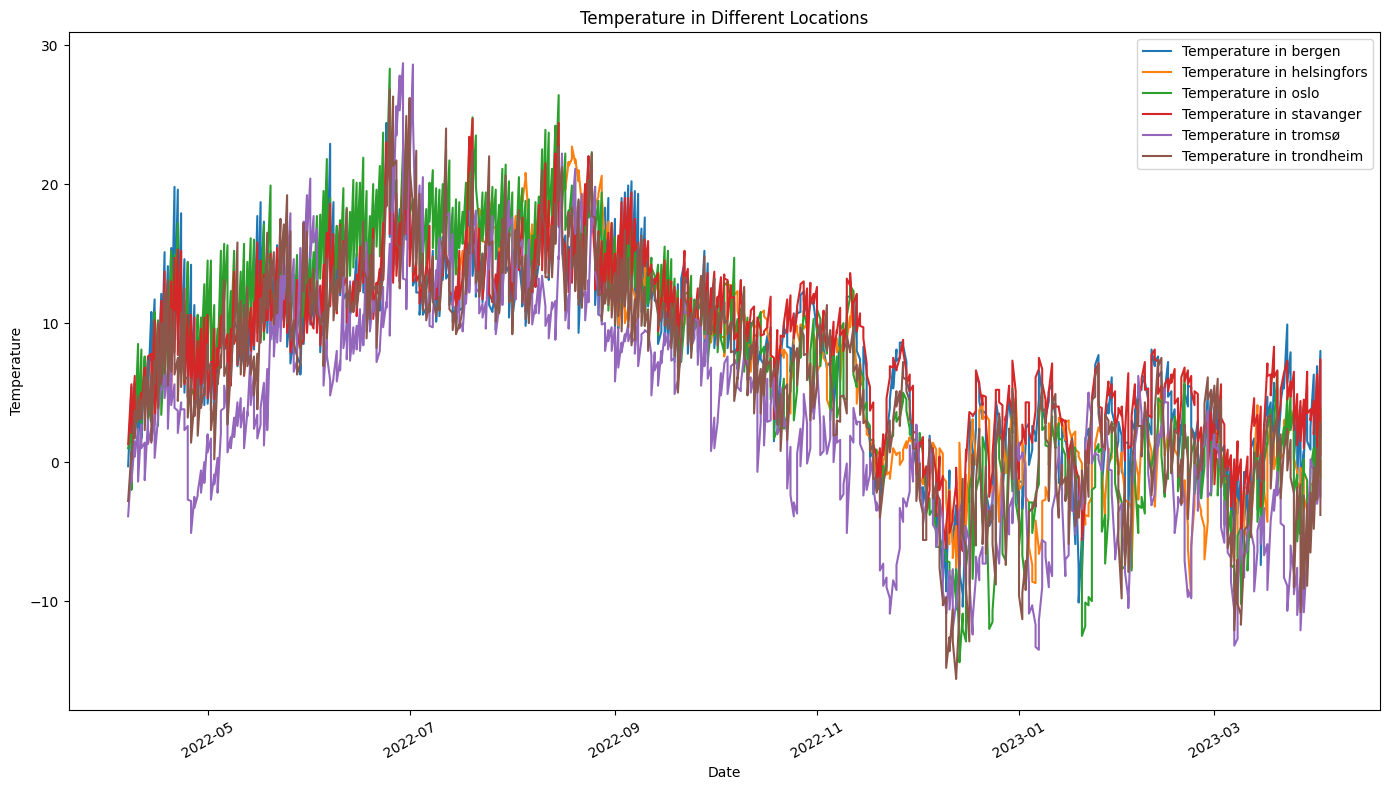

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the style to the default style
plt.style.use('default')

# Convert the 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Group the DataFrame by 'location'
grouped = data.groupby('location')

# Create a figure and axis
plt.figure(figsize=(14, 8))
ax = plt.gca()

# Iterate through each group (city) and plot the data with specific colors
for i, (location, group) in enumerate(grouped):
    # Filter the data to include every 4th observation
    filtered_group = group.iloc[::12]
    
    # Extract the date component from the 'time' column
    filtered_group['date'] = filtered_group['time'].dt.date

    # Plot consumption data with the specific color for this location
    ax.plot(filtered_group['date'], filtered_group['temperature'], label=f'Temperature in {location}', color=colors[i])
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature')
    ax.set_title('Temperature in Different Locations')

# Set a custom tick frequency for the x-axis (e.g., every 4th label)
ax.tick_params(axis='x', rotation=30)

# Add a legend to distinguish lines by location
plt.legend()

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot with all locations
plt.show()


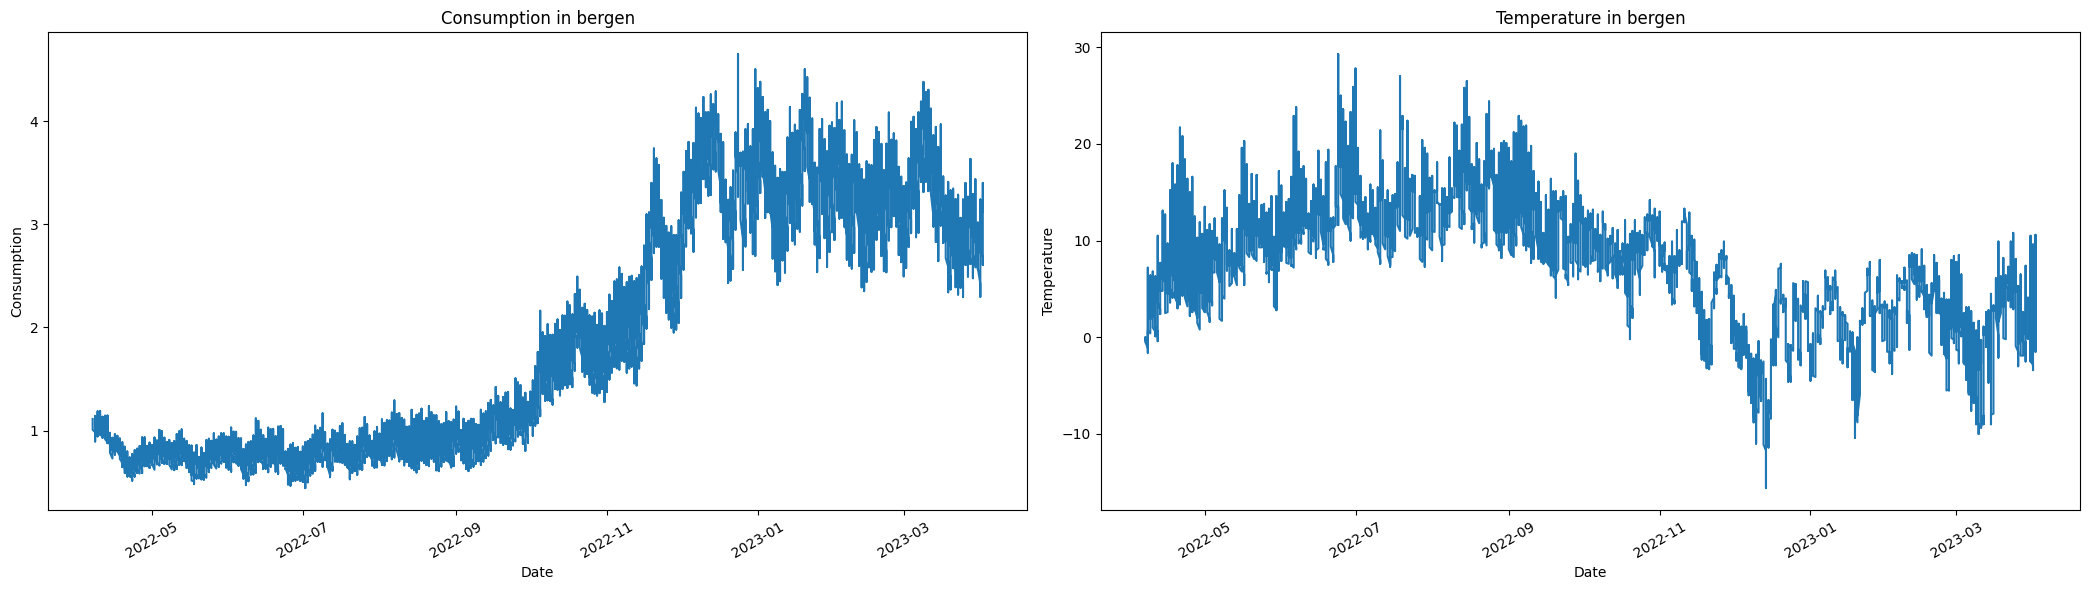

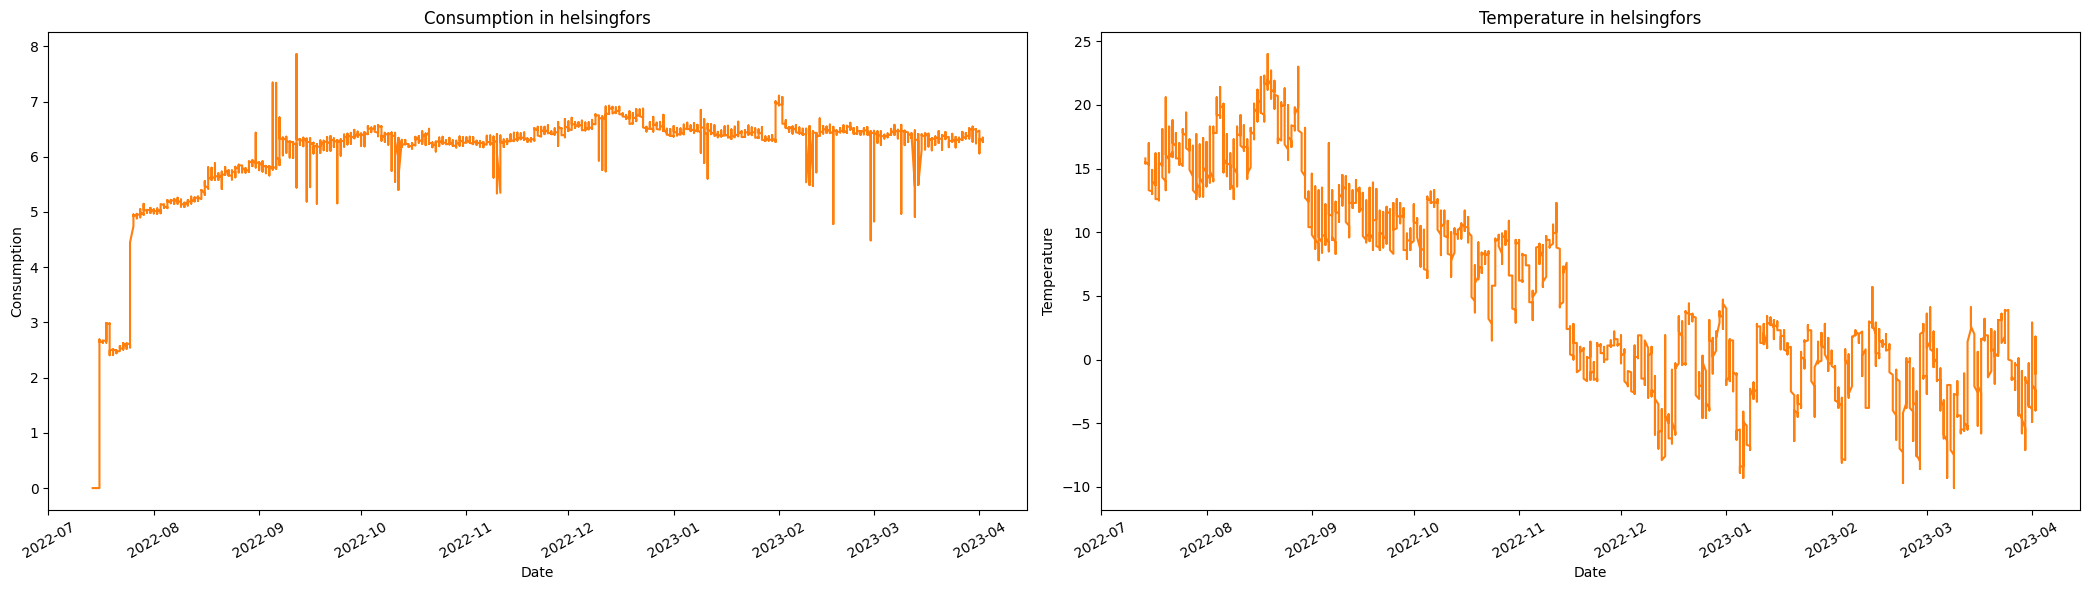

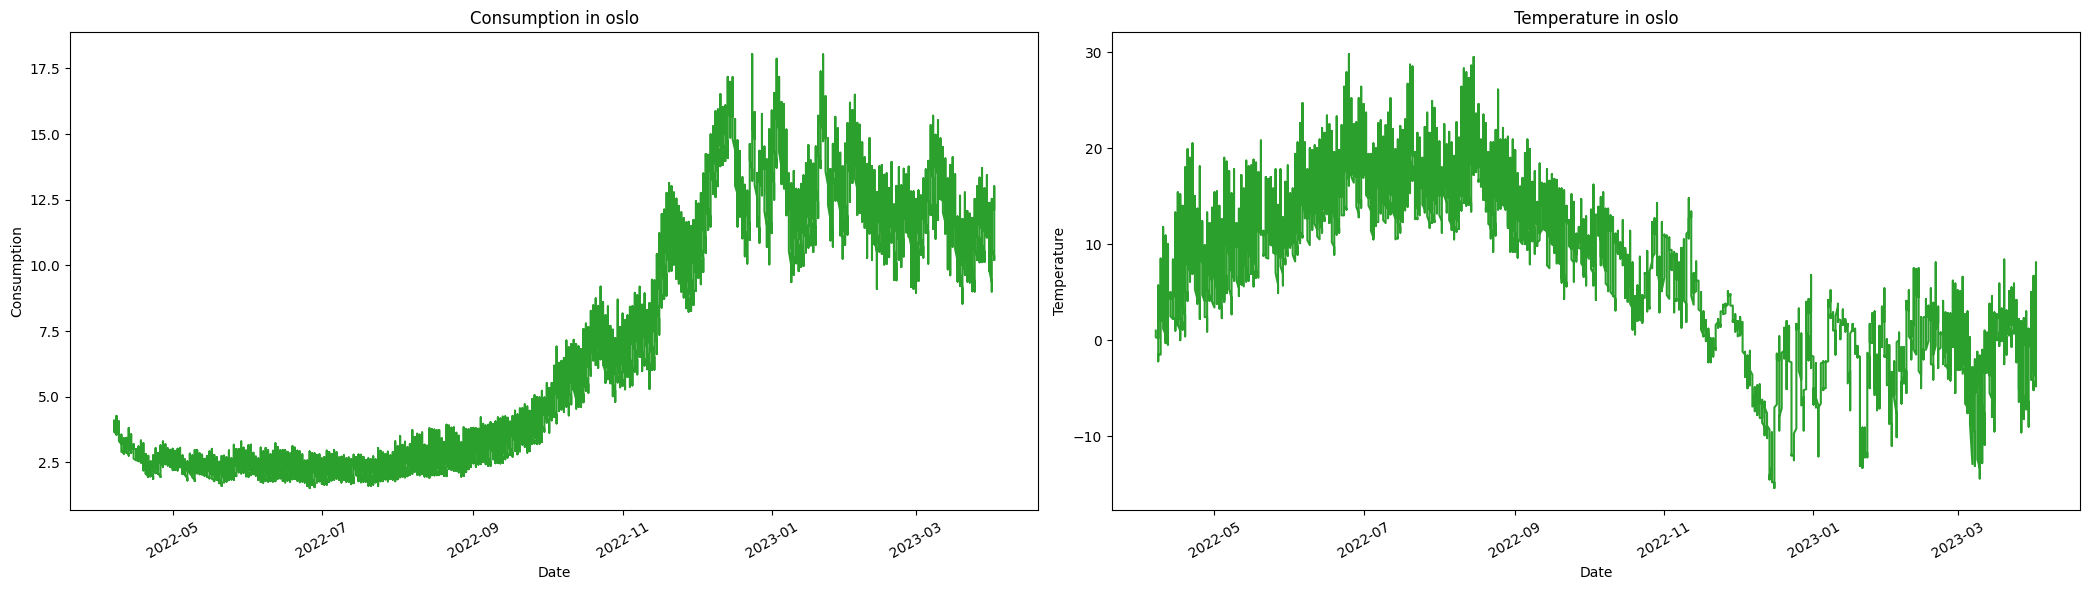

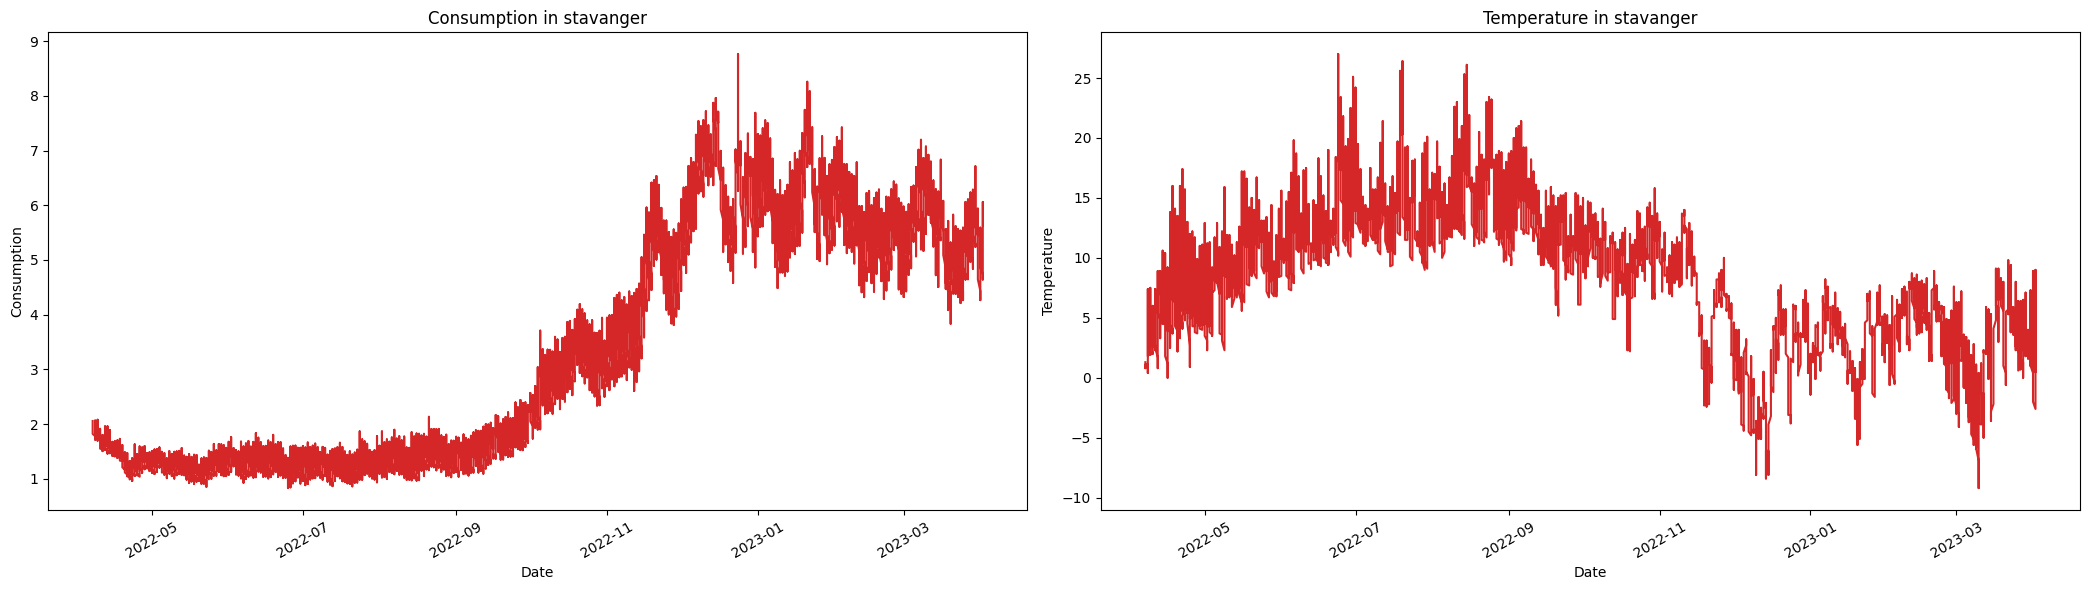

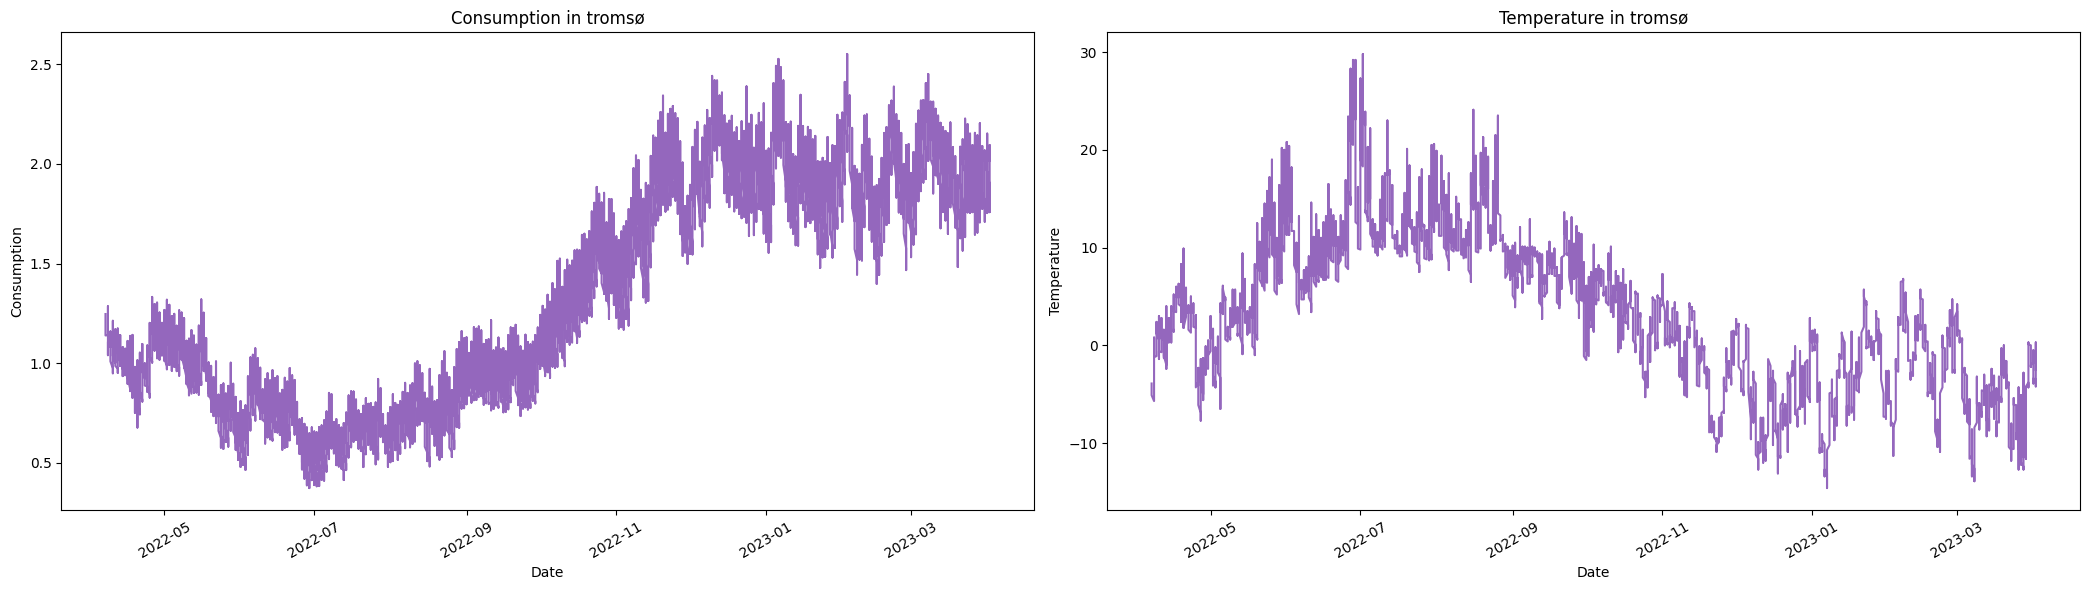

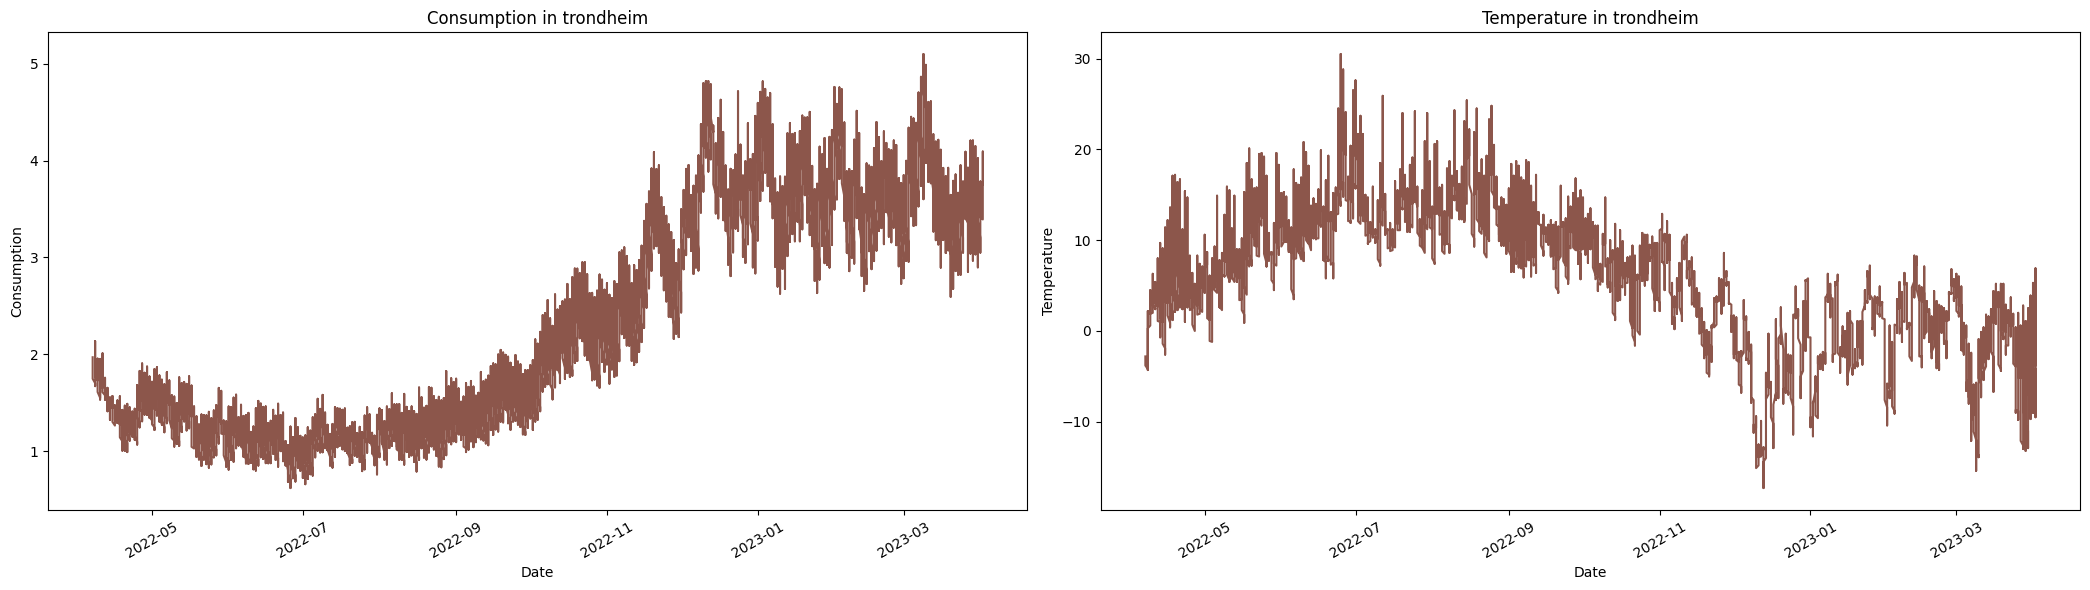

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_location_data(location_data, color):
    # Sort the data by 'time'
    location_data = location_data.sort_values(by='time')
    
    # Filter the data to include every 4th observation
    filtered_data = location_data.iloc[::1]
    
    # Extract the date component from the 'time' column
    filtered_data['date'] = filtered_data['time'].dt.date
    
    # Create a figure with two subplots (side by side)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 6))
    
    # Plot consumption data on the first subplot
    ax1.plot(filtered_data['date'], filtered_data['consumption'], label='Consumption', linestyle='-', color=color)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Consumption')
    ax1.set_title(f'Consumption in {location_data["location"].iloc[0]}')
    
    # Plot temperature data on the second subplot
    ax2.plot(filtered_data['date'], filtered_data['temperature'], label='Temperature', linestyle='-', color=color)
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Temperature')
    ax2.set_title(f'Temperature in {location_data["location"].iloc[0]}')
    
    # Set a custom tick frequency for the x-axis (e.g., every 4th label)
    ax1.tick_params(axis='x', rotation=30)
    ax2.tick_params(axis='x', rotation=30)
    
    # Adjust the layout to prevent overlapping labels
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage:
# Assuming you have a DataFrame named 'data' with columns 'time', 'location', 'consumption', and 'temperature'
# Group the data by 'location' and iterate through the groups
grouped = data.groupby('location')

for i, (location, group) in enumerate(grouped):
    plot_location_data(group, colors[i])



### Outliers
Lets try to find some outliers

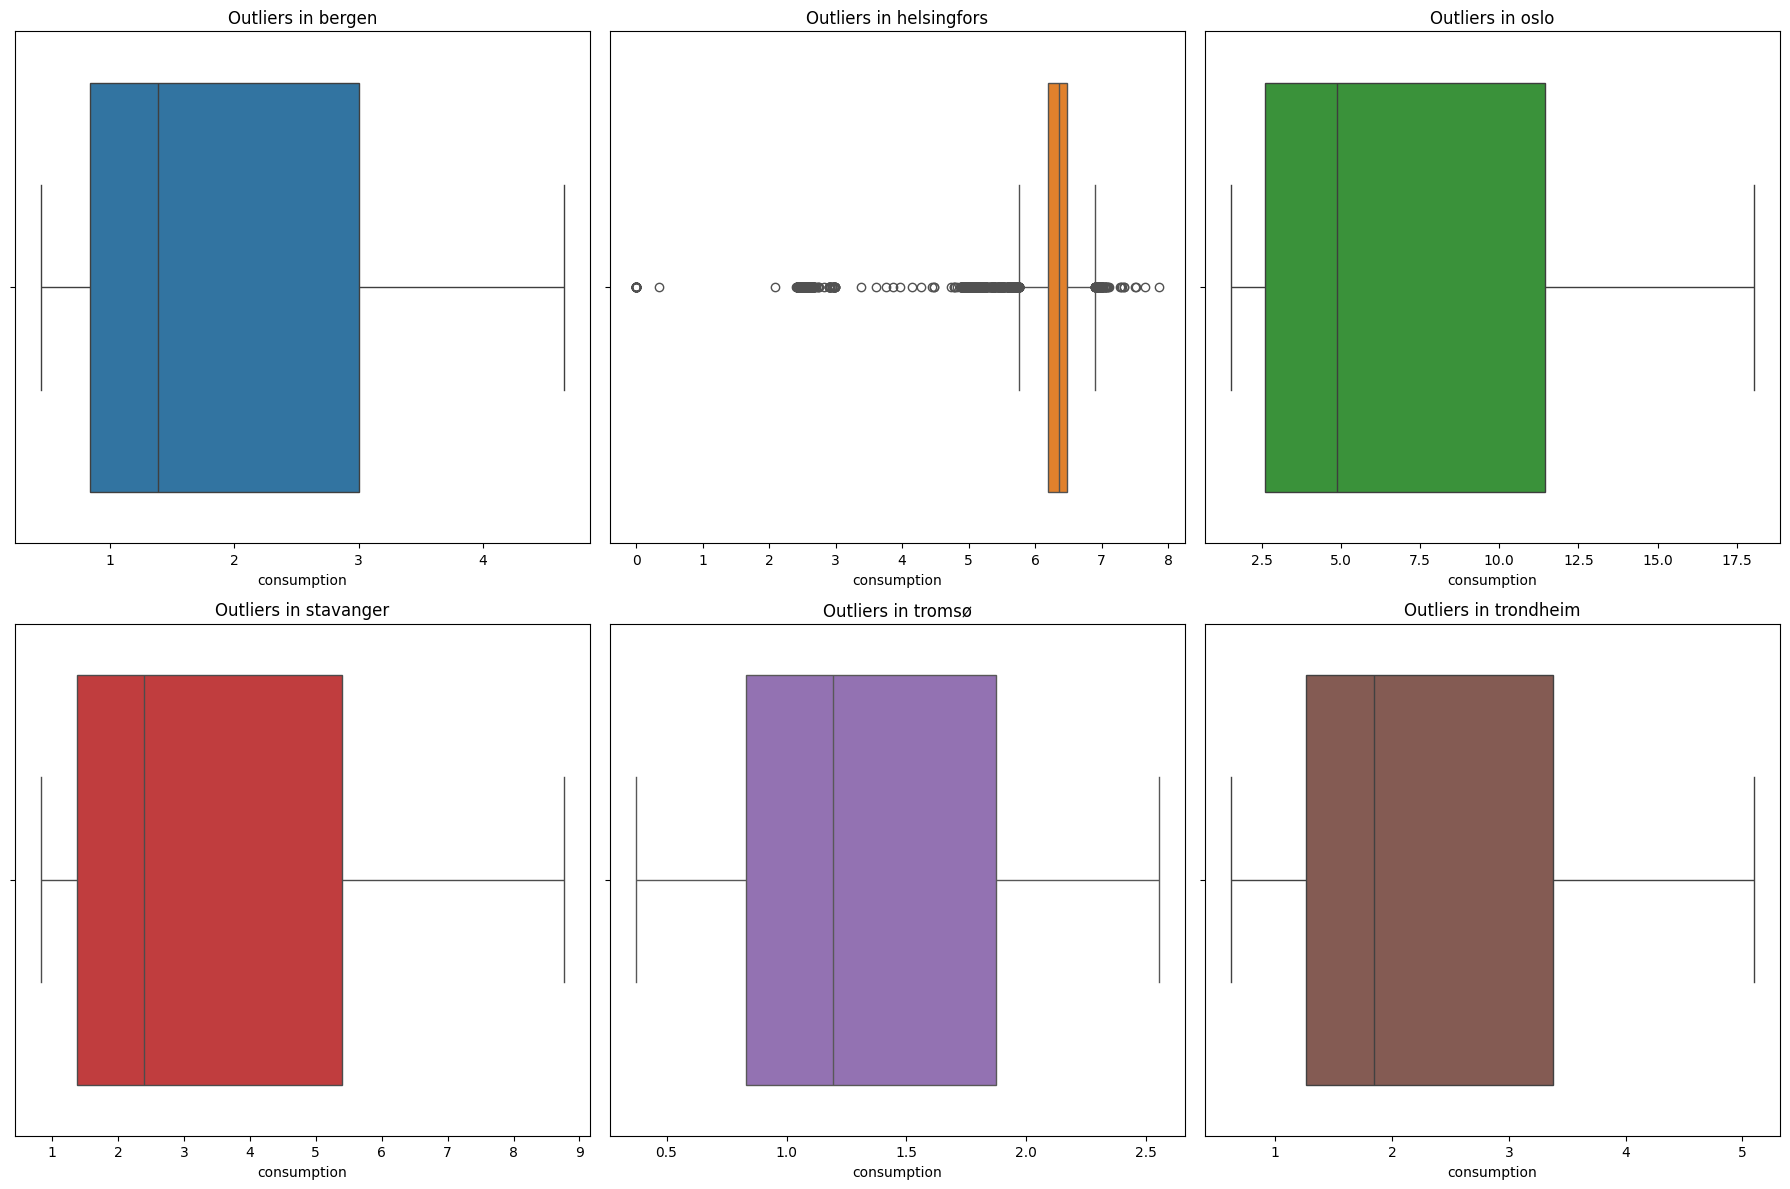

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a method to check for outliers within each location
def check_outliers_by_location(data, location_column, value_column):
    # Create a list to store location names and sort them alphabetically
    locations = sorted(data[location_column].unique())

    # Calculate the number of rows and columns for the subplots
    num_locations = len(locations)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_locations + num_cols - 1) // num_cols

    # Create a figure with subplots for each location
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6 * num_rows), sharex=False)

    # Iterate through each location and check for outliers
    for i, location in enumerate(locations):
        location_data = data[data[location_column] == location]
        row = i // num_cols
        col = i % num_cols

        # Create a box plot to visualize outliers for each location
        sns.boxplot(x=value_column, data=location_data, ax=axes[row, col],color=colors[i])
        axes[row, col].set_title(f'Outliers in {location}')
        axes[row, col].set_xlabel(value_column)
        axes[row, col].set_ylabel('')

        # Set x-axis limits based on the data within each location
        x_min = location_data[value_column].min()
        x_max = location_data[value_column].max() 
        buffer = (x_max - x_min)*0.05
        axes[row, col].set_xlim(x_min-buffer, x_max+buffer)

    # Remove any empty subplots
    for i in range(num_locations, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have a DataFrame named 'data' with columns 'location' and 'consumption'
# Call the method to check for outliers within each location
check_outliers_by_location(data, 'location', 'consumption')


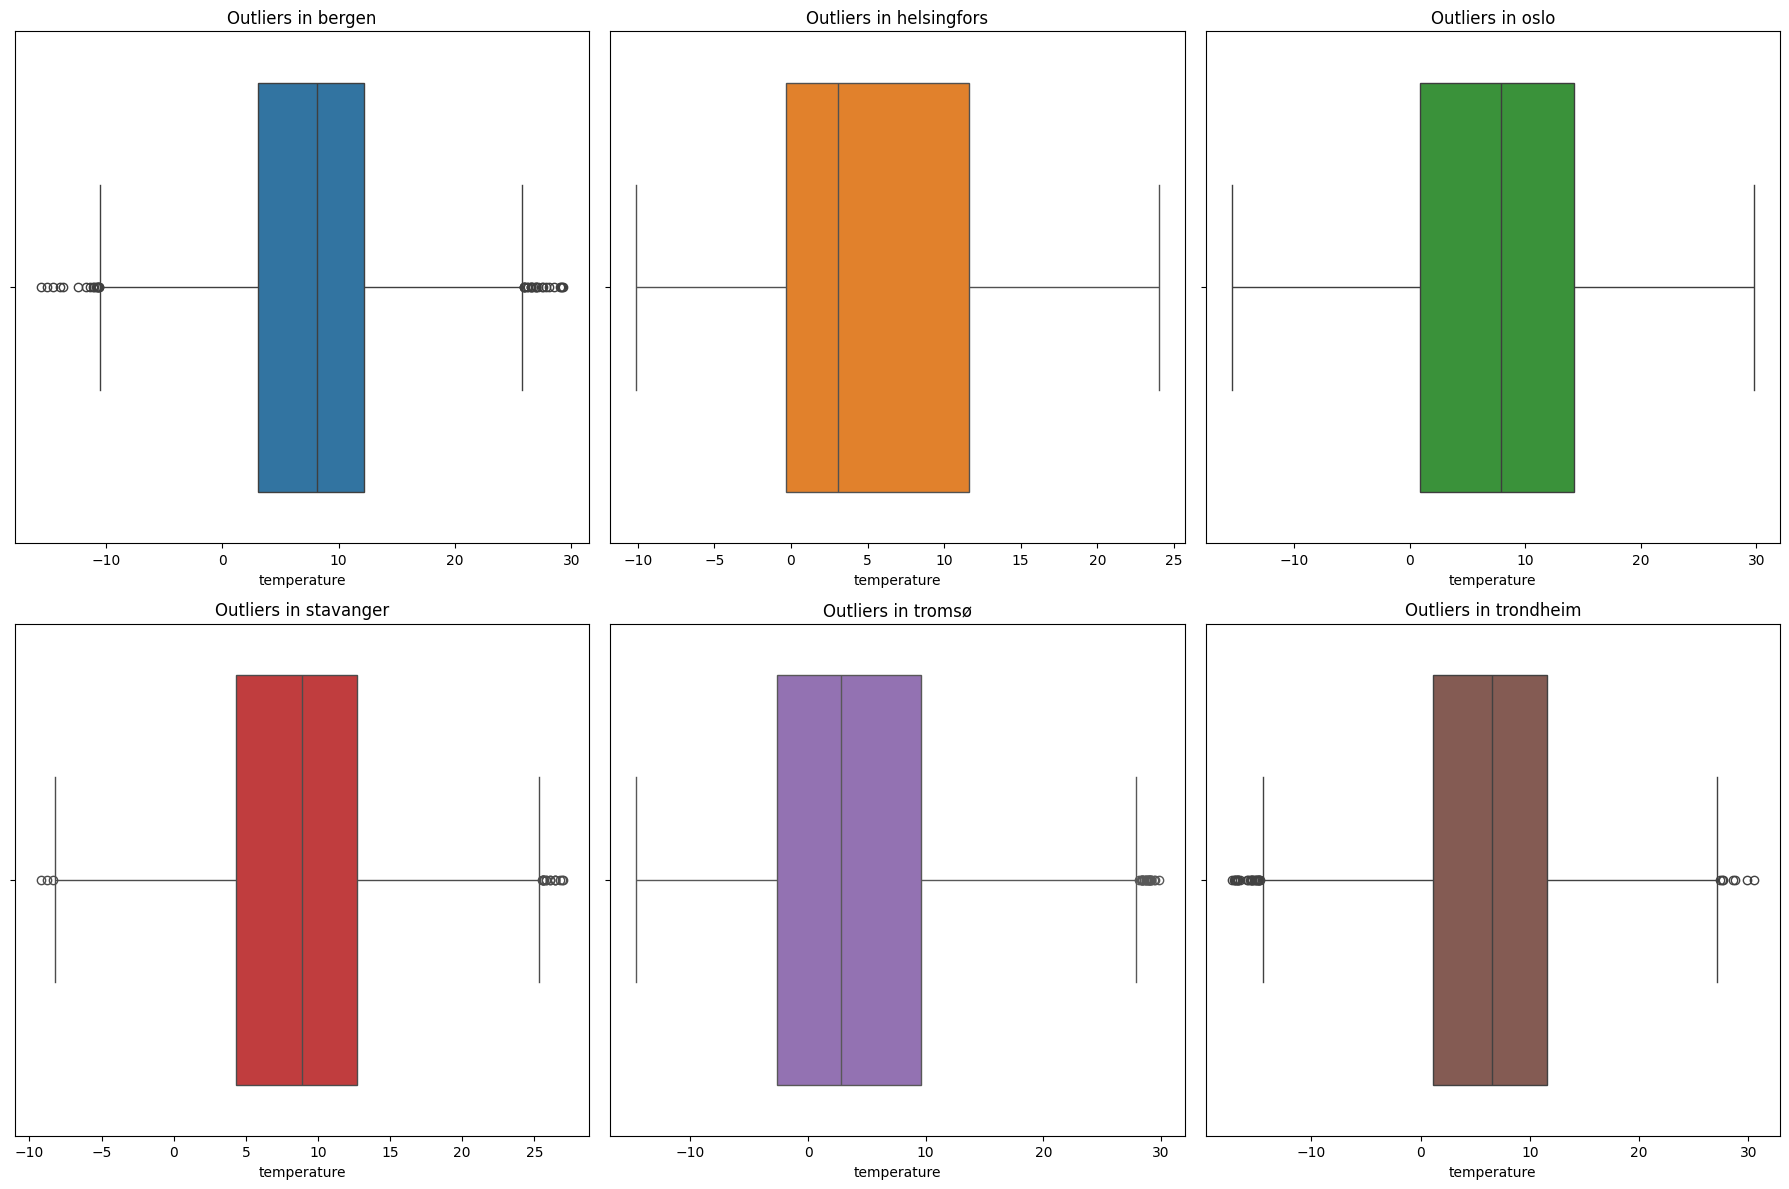

In [166]:
check_outliers_by_location(data, 'location', 'temperature')

First of all, what does Hellsinki do here? We should remove this location at a later point.

We also note that we have roughly an year of observations from spring 2022 to spirng 2023.

### TODO: remove some of the helsingfors data.

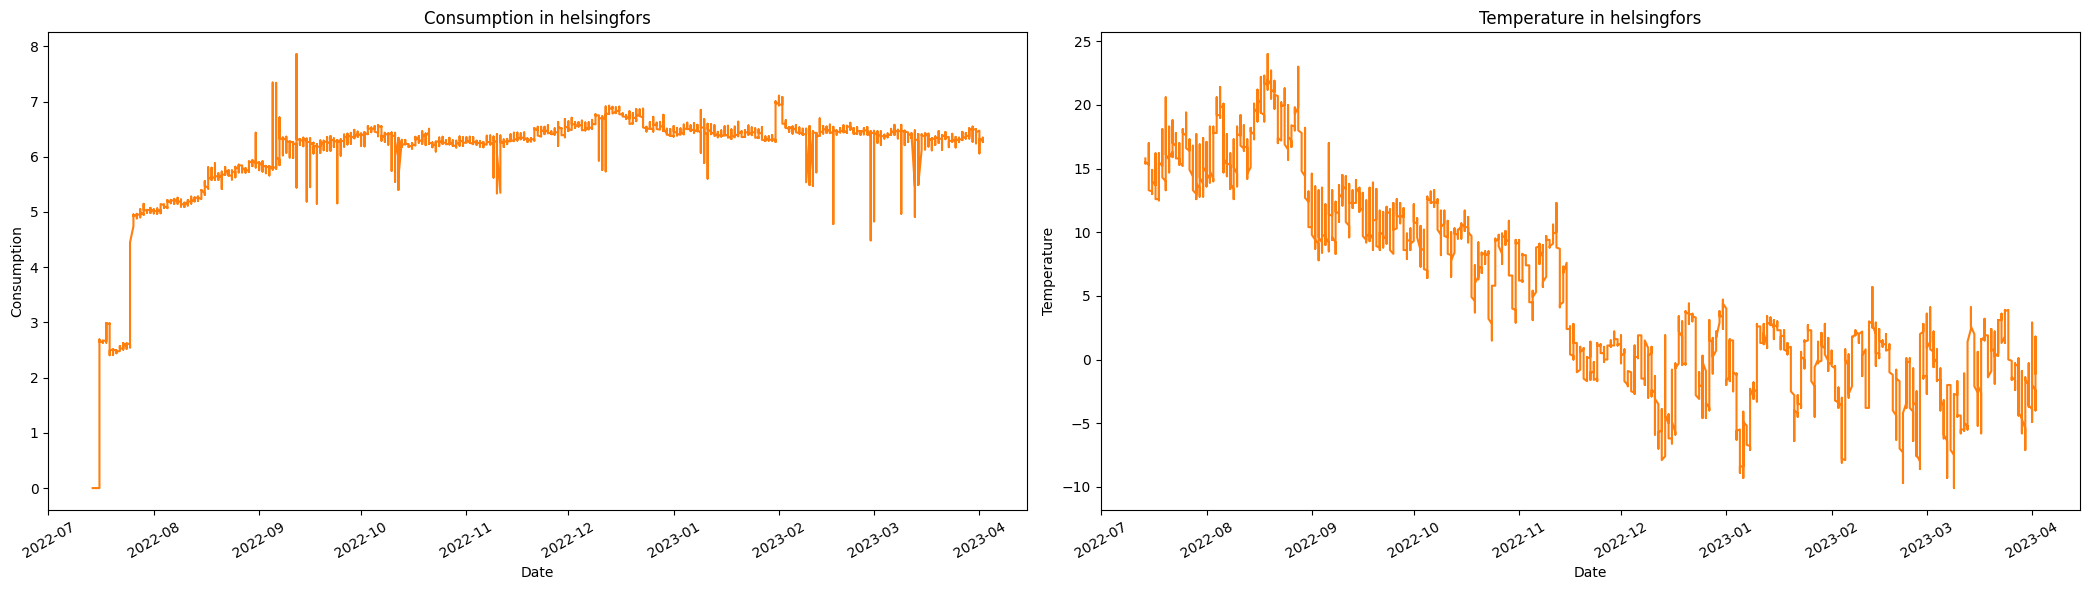

time     location  consumption  temperature
1535 2022-09-16 20:00:00  helsingfors        6.334         11.2
1536 2022-09-16 21:00:00  helsingfors        6.322         10.8
1537 2022-09-16 22:00:00  helsingfors        5.449         10.3
1538 2022-09-16 23:00:00  helsingfors        6.229          9.7
1539 2022-09-17 00:00:00  helsingfors        6.248          9.4

In [167]:
data["time"] = pd.to_datetime(data["time"])
data_hels = data[data["location"] == "helsingfors"].reset_index(drop=True)
plot_location_data(data_hels,colors[1])
data_hels[1535:].head() #drop the 5.449

2022-09-16 22:00:00 is the last index before it seems to stabilize. Lets remove them i guess

In [168]:
cut_date = data_hels.loc[1537]["time"]
data_removed = data[~((data["location"] == "helsingfors") & (data["time"] <= cut_date))]
data = data_removed.copy()


### TODO: remove outliers/spikes

C:\Users\marti\AppData\Local\Temp\ipykernel_6736\788667211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hels['z_score'] = np.abs((data_hels['consumption'] - data_hels['consumption'].mean()) / data_hels['consumption'].std())


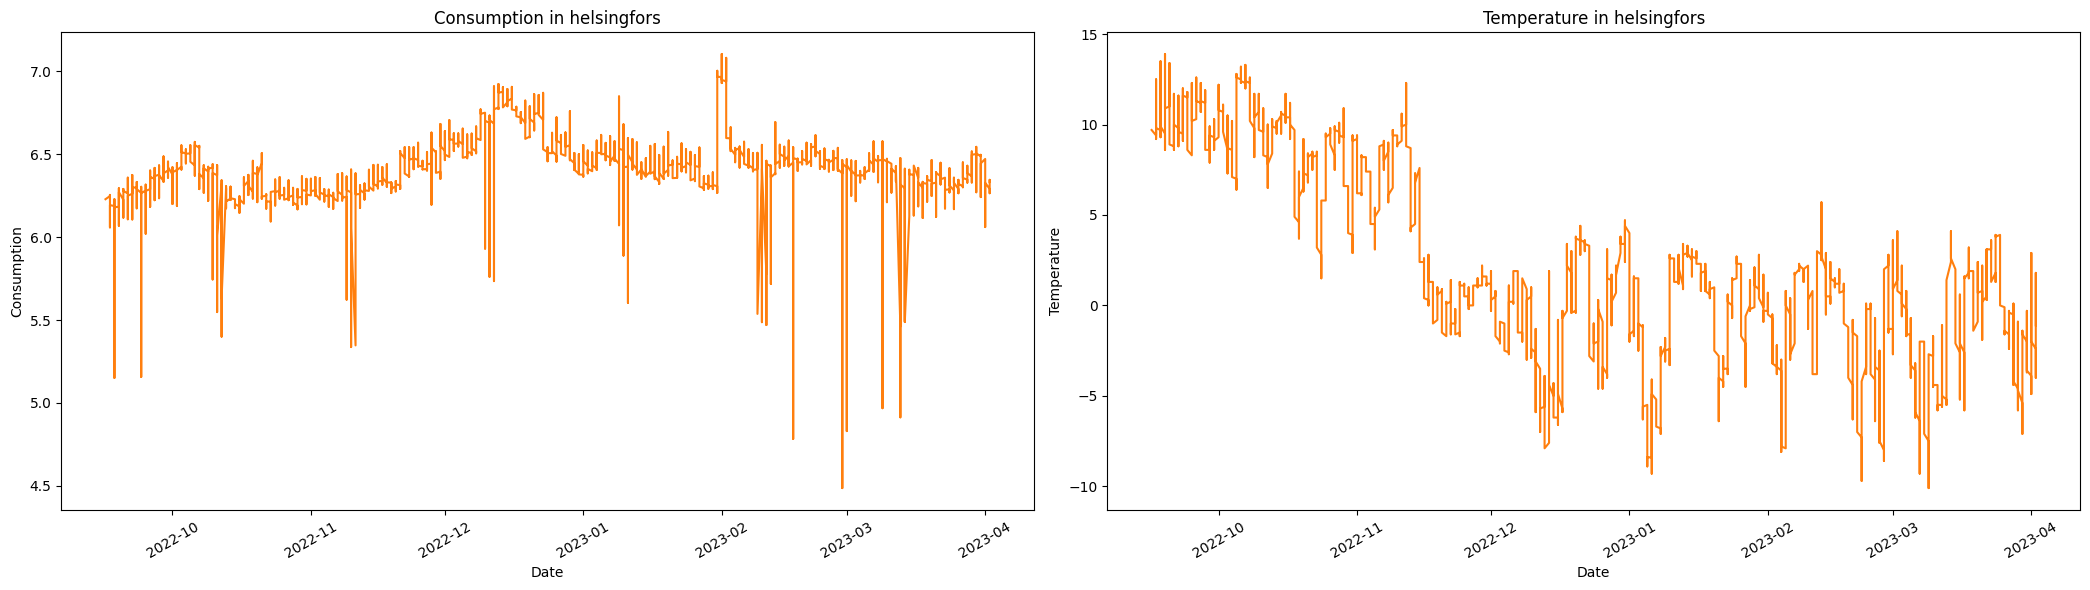

In [169]:
data_hels = data[data["location"] == "helsingfors"]
threshold = 2

data_hels['z_score'] = np.abs((data_hels['consumption'] - data_hels['consumption'].mean()) / data_hels['consumption'].std())

# Identify outliers using the threshold
outliers = data_hels[data_hels['z_score'] > threshold]
plot_location_data(data_hels,colors[1])


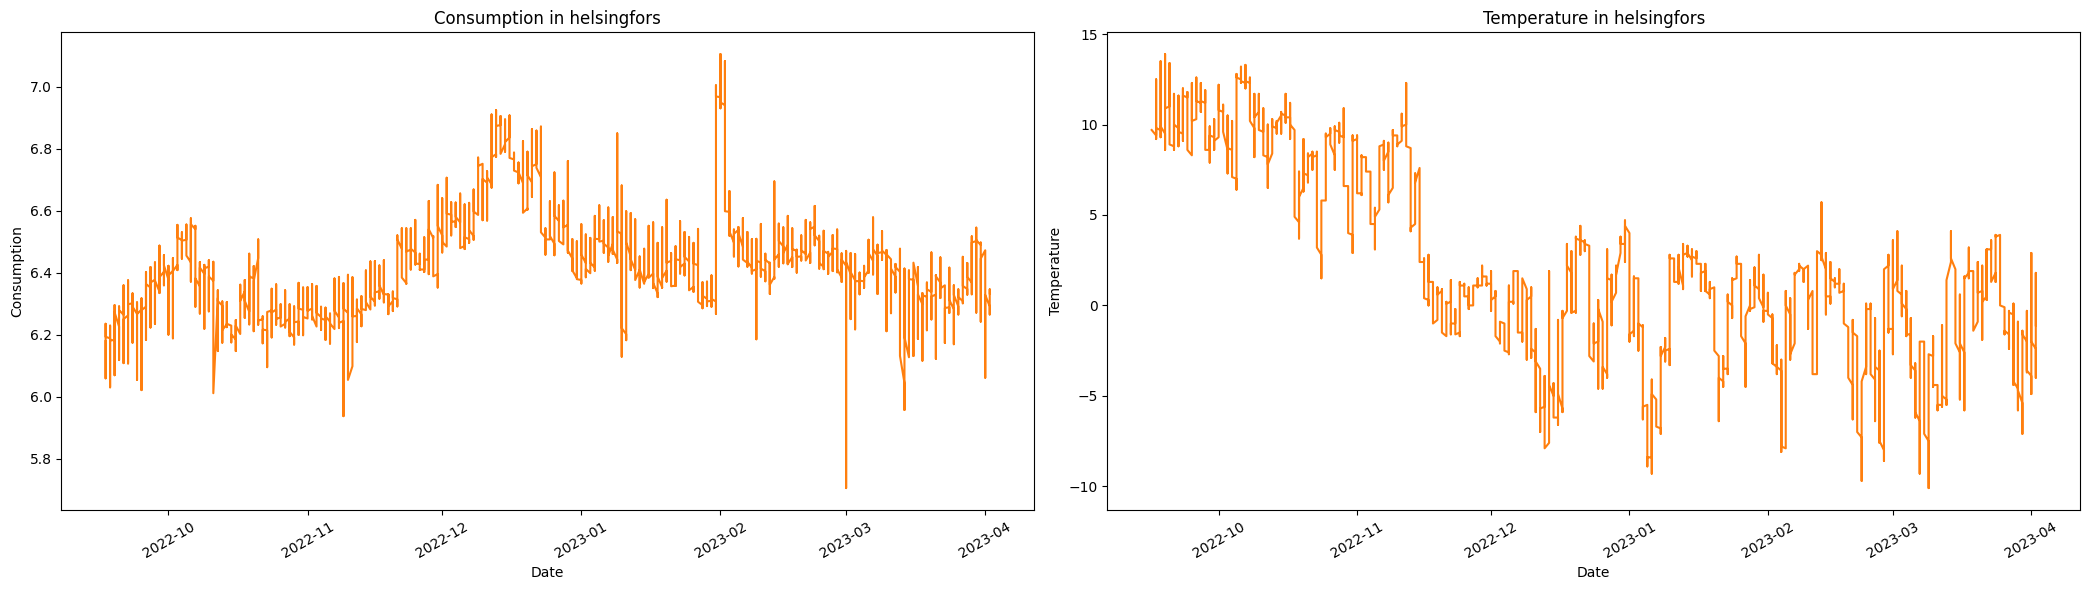

In [170]:
import pandas as pd
import numpy as np

def clean_time_series(data, column_name, window_size, threshold):
    df = data.copy()
    # Convert the 'time' column to datetime
    df['time'] = pd.to_datetime(df['time'])

    # Calculate the rolling mean and standard deviation for the entire dataset
    df['rolling_mean'] = df[column_name].rolling(window=window_size).mean()
    df['rolling_std'] = df[column_name].rolling(window=window_size).std()

    # Replace spikes with NaN based on the threshold
    df[column_name] = np.where(
        abs(df[column_name] - df['rolling_mean']) <= threshold,
        df[column_name],
        np.nan
    )

    return df

cleaned_data = clean_time_series(data_hels, 'consumption', window_size=6, threshold=0.2)
cleaned_data["consumption"] = cleaned_data["consumption"].interpolate(method='linear')
cleaned_data = cleaned_data[["location","time","temperature","consumption"]].copy()
data.loc[cleaned_data.index] = cleaned_data.copy()
plot_location_data(cleaned_data,colors[1])



## Manipulate the data

Next, we try to manipulate our data into a dataframe which corresponds to what information is avaliable

In [171]:


df = data.sort_values(by=['location', 'time'])
df["time"] = pd.to_datetime(df["time"])
# Calculate consumption means with shift
hours_shift_back = 4 * 24 + 11  #4 days back, plus the shift back to midnight.As in the example by ANEA, we shift from 10:00 september 19 to 23:00 septembeer 13
df["consumption-5_mean_lag_1d"] = df.groupby('location')['consumption'].shift(hours_shift_back).rolling(window=24 * 1).mean()
df["consumption-5_mean_lag_3d"] = df.groupby('location')['consumption'].shift(hours_shift_back).rolling(window=24 * 3).mean()
df["consumption-5_mean_lag_7d"] = df.groupby('location')['consumption'].shift(hours_shift_back).rolling(window=24 * 7).mean()
df["consumption-5_mean_lag_14d"] = df.groupby('location')['consumption'].shift(hours_shift_back).rolling(window=24 * 14).mean()

# Calculate temperature means with shift
hours_shift_forward = 13  ##takes the time from 10:00 to 23:00 the same day
df["temperature_mean_lag_1d"] = df.groupby('location')['temperature'].shift(hours_shift_forward).rolling(window=24 * 1).mean()
df["temperature_mean_lag_3d"] = df.groupby('location')['temperature'].shift(hours_shift_forward).rolling(window=24 * 3).mean()
df["temperature_mean_lag_7d"] = df.groupby('location')['temperature'].shift(hours_shift_forward).rolling(window=24 * 7).mean()
df["temperature_mean_lag_14d"] = df.groupby('location')['temperature'].shift(hours_shift_forward).rolling(window=24 * 14).mean()

df_days_before = df[df["time"].dt.time == pd.to_datetime("10:00:00").time()]                 # we only need the historic values at 10:00
df_days_before.dropna(inplace=True)                                                     #For some dates we do not have the amount of data to calculate the means, we therefore drop them
df_days_before["date_of_prediction"] = (pd.to_datetime(df_days_before["time"]) - pd.Timedelta(days=1)).dt.date                 # the date of which the prediction was made
df_days_before.drop(columns=["consumption","temperature","time"],inplace=True)                 # Not relevant for the days before
df_days_before.isna().sum()


C:\Users\marti\AppData\Local\Temp\ipykernel_6736\231814570.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_days_before.dropna(inplace=True)                                                     #For some dates we do not have the amount of data to calculate the means, we therefore drop them
C:\Users\marti\AppData\Local\Temp\ipykernel_6736\231814570.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_days_before["date_of_prediction"] = (pd.to_datetime(df_days_before["time"]) - pd.Timedelta(days=1)).dt.date                 # the date of which the predictio

location                      0
consumption-5_mean_lag_1d     0
consumption-5_mean_lag_3d     0
consumption-5_mean_lag_7d     0
consumption-5_mean_lag_14d    0
temperature_mean_lag_1d       0
temperature_mean_lag_3d       0
temperature_mean_lag_7d       0
temperature_mean_lag_14d      0
date_of_prediction            0
dtype: int64

This dataframe contains historic value that we can use for our predictions each day. Note that the lag values for consiumptions starts 5 days a head of the day which we are predicting for. This is due to the restriction in the given problem. The temperatur, however, has the lags from the same day of the prediction.


Next up, we have to combine our historic data with each hours prediction ahead in time. Since we also have the temprature forecasts a head of time, we can use the current forcasted value, as well as the previous hours.

In [172]:
df = data.sort_values(by=["location", "time"])
df["temperature_mean_lag_1h"] = df.groupby("location")["temperature"].shift(1).rolling(window=1).mean()
df["temperature_mean_lag_3h"] = df.groupby("location")["temperature"].shift(1).rolling(window=3).mean()
df["temperature_mean_lag_6h"] = df.groupby("location")["temperature"].shift(1).rolling(window=6).mean()
df["date_of_prediction"] = (pd.to_datetime(df["time"]) - pd.Timedelta(days=1)).dt.date



If we merge these two frames, we get the historic information for each variable timepoint we are predicting.

In [173]:
df_full = df.merge(df_days_before,on=["date_of_prediction","location"])
df_full.isna().sum()

time                          0
location                      0
consumption                   0
temperature                   0
temperature_mean_lag_1h       0
temperature_mean_lag_3h       0
temperature_mean_lag_6h       0
date_of_prediction            0
consumption-5_mean_lag_1d     0
consumption-5_mean_lag_3d     0
consumption-5_mean_lag_7d     0
consumption-5_mean_lag_14d    0
temperature_mean_lag_1d       0
temperature_mean_lag_3d       0
temperature_mean_lag_7d       0
temperature_mean_lag_14d      0
dtype: int64

## Extract info from date

Firsty, we check if the datatypes match, which they do.

In [174]:
df_full.dtypes

time                          datetime64[ns]
location                              object
consumption                          float64
temperature                          float64
temperature_mean_lag_1h              float64
temperature_mean_lag_3h              float64
temperature_mean_lag_6h              float64
date_of_prediction                    object
consumption-5_mean_lag_1d            float64
consumption-5_mean_lag_3d            float64
consumption-5_mean_lag_7d            float64
consumption-5_mean_lag_14d           float64
temperature_mean_lag_1d              float64
temperature_mean_lag_3d              float64
temperature_mean_lag_7d              float64
temperature_mean_lag_14d             float64
dtype: object

We add some important feautures from the date

In [175]:
df_full["time"] = pd.to_datetime(df_full["time"])
df_full["day_of_week"] = df_full["time"].dt.dayofweek
df_full["day_of_year"] = df_full["time"].dt.dayofyear
df_full["hour_of_day"] = df_full["time"].dt.hour
df_full["day_of_month"] = df_full["time"].dt.day
df_full["month"] = df_full["time"].dt.month

df_full.head(50)

time location  consumption  temperature  \
0  2022-04-26 00:00:00   bergen     0.583449     4.000000   
1  2022-04-26 01:00:00   bergen     0.597281     3.300000   
2  2022-04-26 02:00:00   bergen     0.592792     2.900000   
3  2022-04-26 03:00:00   bergen     0.604434     2.900000   
4  2022-04-26 04:00:00   bergen     0.664663     2.600000   
5  2022-04-26 05:00:00   bergen     0.768717     3.500000   
6  2022-04-26 06:00:00   bergen     0.702239     5.800000   
7  2022-04-26 07:00:00   bergen     0.667576     8.800000   
8  2022-04-26 08:00:00   bergen     0.657031    12.000000   
9  2022-04-26 09:00:00   bergen     0.625972    14.200000   
10 2022-04-26 10:00:00   bergen     0.606212    15.600000   
11 2022-04-26 11:00:00   bergen     0.612756    16.299999   
12 2022-04-26 12:00:00   bergen     0.622187    16.600000   
13 2022-04-26 13:00:00   bergen     0.679001    16.600000   
14 2022-04-26 14:00:00   bergen     0.740485    16.100000   
15 2022-04-26 15:00:00   bergen     0.706957    15.700000   
16 2022-04-26 16:00:00   bergen     0.712687    14.800000   
17 2022-04-26 17:00:00   bergen     0.740692    13.400000   
18 2022-04-26 18:00:00   bergen     0.786818    11.600000   
19 2022-04-26 19:00:00   bergen     0.831744     9.200000   
20 2022-04-26 20:00:00   bergen     0.851277     7.300000   
21 2022-04-26 21:00:00   bergen     0.810521     5.800000   
22 2022-04-26 22:00:00   bergen     0.737723     4.900000   
23 2022-04-26 23:00:00   bergen     0.671151     4.100000   
24 2022-04-27 00:00:00   bergen     0.621232     3.300000   
25 2022-04-27 01:00:00   bergen     0.588333     3.500000   
26 2022-04-27 02:00:00   bergen     0.628818     3.100000   
27 2022-04-27 03:00:00   bergen     0.639226     3.000000   
28 2022-04-27 04:00:00   bergen     0.715729     2.800000   
29 2022-04-27 05:00:00   bergen     0.767427     3.400000   
30 2022-04-27 06:00:00   bergen     0.762917     5.200000   
31 2022-04-27 07:00:00   bergen     0.720107     7.300000   
32 2022-04-27 08:00:00   bergen     0.692992     9.600000   
33 2022-04-27 09:00:00   bergen     0.662353    11.300000   
34 2022-04-27 10:00:00   bergen     0.662563    12.300000   
35 2022-04-27 11:00:00   bergen     0.639024    12.500000   
36 2022-04-27 12:00:00   bergen     0.648235    11.700000   
37 2022-04-27 13:00:00   bergen     0.708251    11.200000   
38 2022-04-27 14:00:00   bergen     0.801482    10.800000   
39 2022-04-27 15:00:00   bergen     0.805824    10.000000   
40 2022-04-27 16:00:00   bergen     0.796852     9.000000   
41 2022-04-27 17:00:00   bergen     0.815181     8.000000   
42 2022-04-27 18:00:00   bergen     0.851883     6.800000   
43 2022-04-27 19:00:00   bergen     0.934113     5.600000   
44 2022-04-27 20:00:00   bergen     0.932498     4.400000   
45 2022-04-27 21:00:00   bergen     0.874200     3.500000   
46 2022-04-27 22:00:00   bergen     0.781207     3.200000   
47 2022-04-27 23:00:00   bergen     0.711442     3.000000   
48 2022-04-28 00:00:00   bergen     0.684068     2.000000   
49 2022-04-28 01:00:00   bergen     0.671543     4.100000   

    temperature_mean_lag_1h  temperature_mean_lag_3h  temperature_mean_lag_6h  \
0                  4.100000                 4.233333                 6.166667   
1                  4.000000                 4.033333                 5.133333   
2                  3.300000                 3.800000                 4.350000   
3                  2.900000                 3.400000                 3.816667   
4                  2.900000                 3.033333                 3.533333   
5                  2.600000                 2.800000                 3.300000   
6                  3.500000                 3.000000                 3.200000   
7                  5.800000                 3.966667                 3.500000   
8                  8.800000                 6.033333                 4.416667   
9                 12.000000                 8.866667                 5.933333   
10             

Lets do a pairs plot

c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: Us

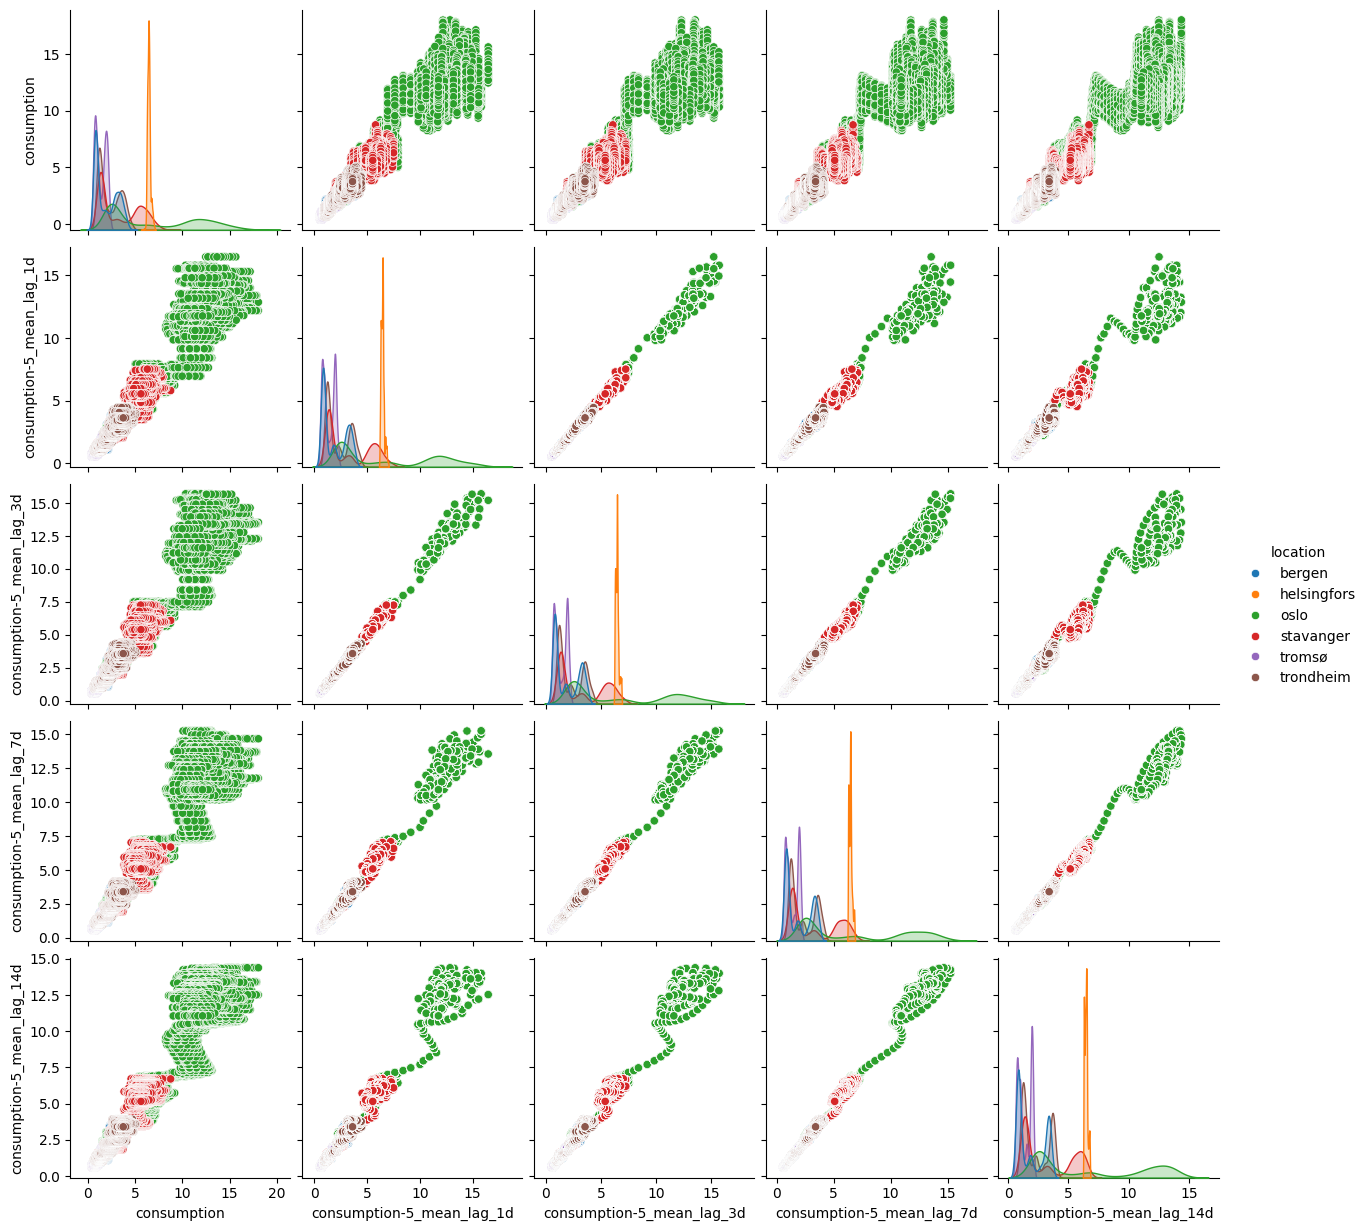

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to the default style
plt.style.use('default')

# Assuming you have a DataFrame named df_full with a 'location' column
# and columns 'consumption', 'consumption-lag_5d', 'consumption-lag_6d', 'consumption-lag_7d'

# Create a pairplot with colors by location
sns.pairplot(data=df_full, vars=["consumption", "consumption-5_mean_lag_1d", "consumption-5_mean_lag_3d", "consumption-5_mean_lag_7d","consumption-5_mean_lag_14d"], hue="location", palette=colors)

# Show the pairplot
plt.show()


c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: Us

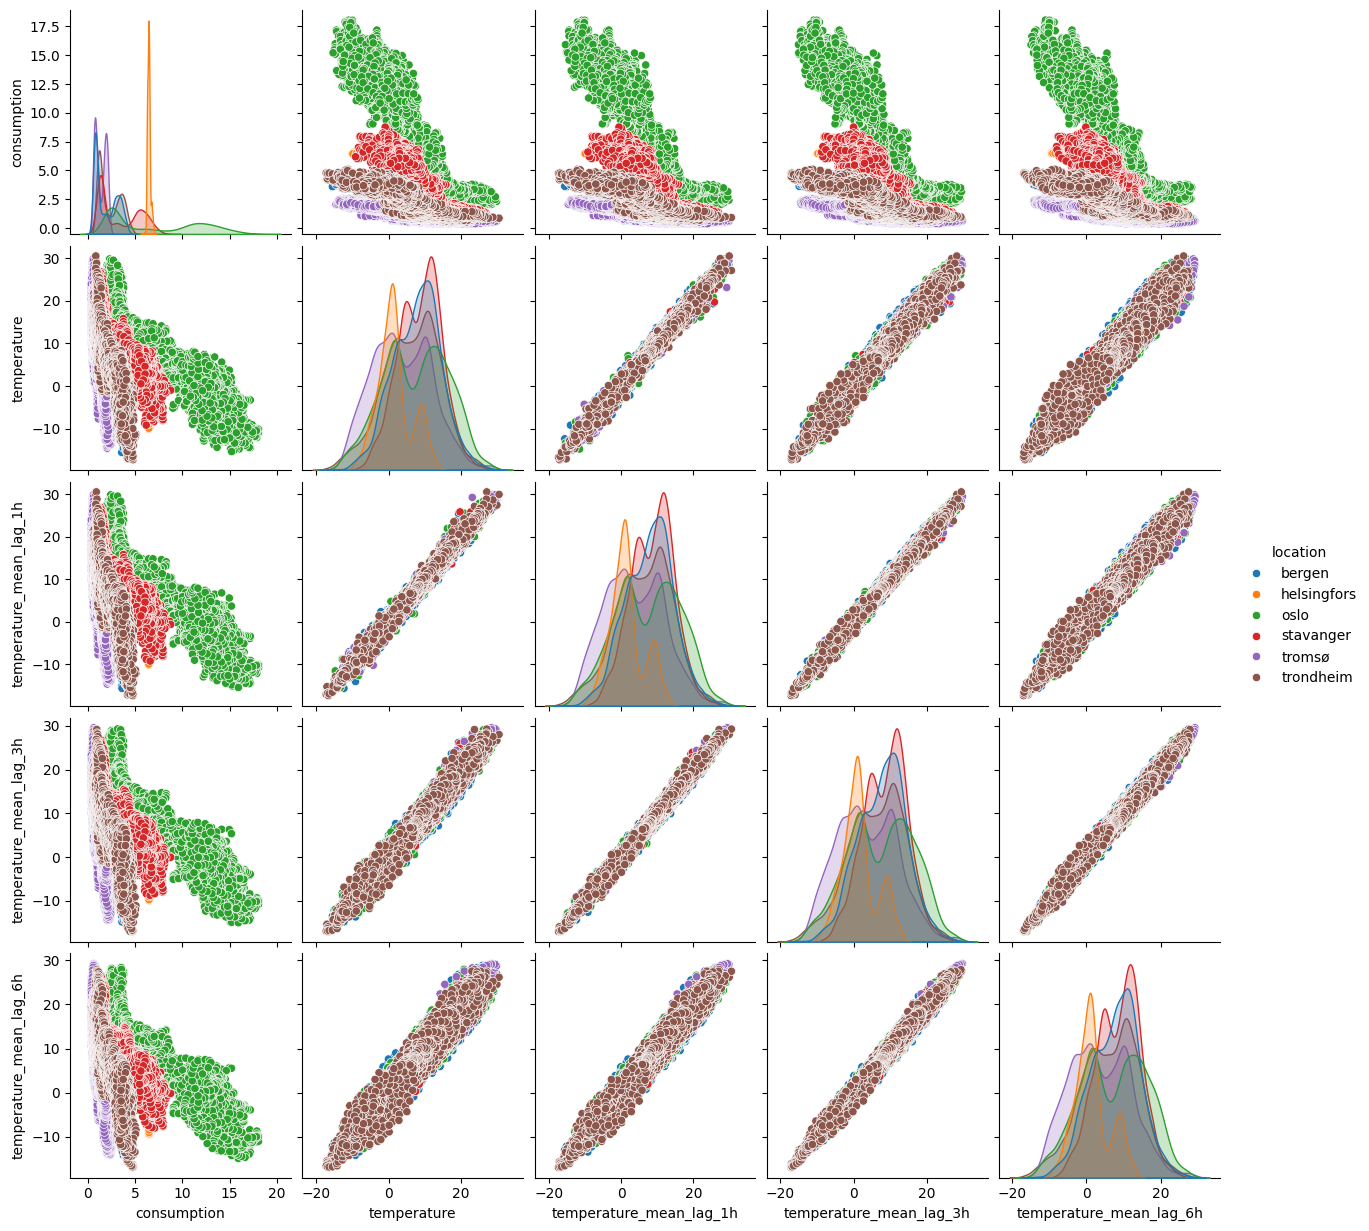

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style to the default style
plt.style.use('default')

# Assuming you have a DataFrame named df_full with a 'location' column
# and columns 'consumption', 'temperature_mean_lag_1h', 'temperature_mean_lag_3h', 'temperature_mean_lag_6h'

# Create a pairplot with custom colors by location
sns.pairplot(data=df_full, vars=["consumption", "temperature","temperature_mean_lag_1h", "temperature_mean_lag_3h", "temperature_mean_lag_6h"], hue="location", palette=colors)

# Show the pairplot
plt.show()


c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  func(x=vector, **plot_kwargs)
c:\Users\marti\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1513: Us

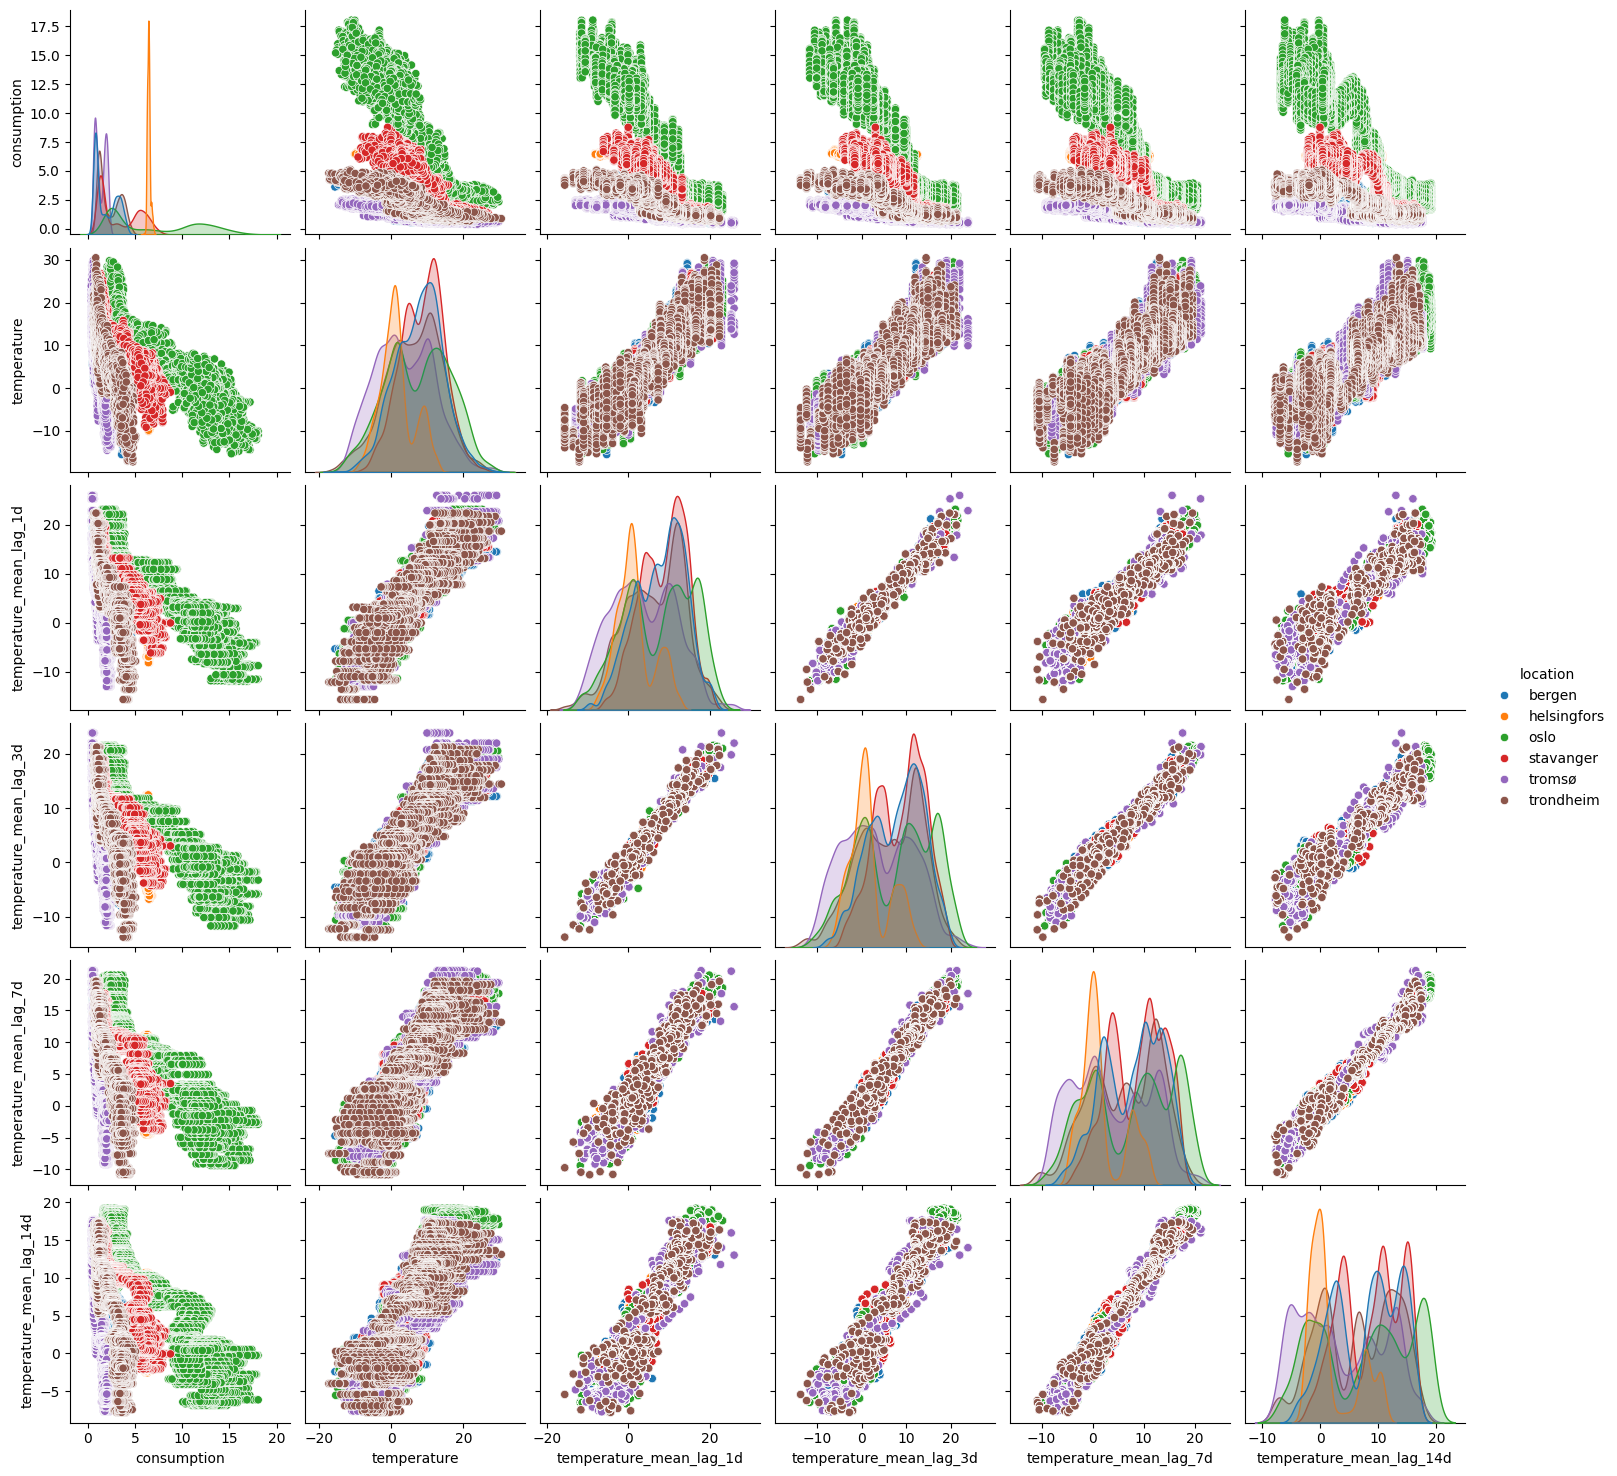

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style to the default style
plt.style.use('default')

# Assuming you have a DataFrame named df_full with a 'location' column
# and columns 'consumption', 'temperature_mean_lag_1h', 'temperature_mean_lag_3h', 'temperature_mean_lag_6h'

# Create a pairplot with custom colors by location
sns.pairplot(data=df_full, vars=["consumption", "temperature","temperature_mean_lag_1d", "temperature_mean_lag_3d", "temperature_mean_lag_7d","temperature_mean_lag_14d"], hue="location", palette=colors)

# Show the pairplot
plt.show()


C:\Users\marti\AppData\Local\Temp\ipykernel_6736\965674335.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_cut.corr()


[Text(0.5, 0, 'consumption'),
 Text(1.5, 0, 'temperature'),
 Text(2.5, 0, 'temperature_mean_lag_1h'),
 Text(3.5, 0, 'temperature_mean_lag_3h'),
 Text(4.5, 0, 'temperature_mean_lag_6h'),
 Text(5.5, 0, 'consumption-5_mean_lag_1d'),
 Text(6.5, 0, 'consumption-5_mean_lag_3d'),
 Text(7.5, 0, 'consumption-5_mean_lag_7d'),
 Text(8.5, 0, 'consumption-5_mean_lag_14d'),
 Text(9.5, 0, 'temperature_mean_lag_1d'),
 Text(10.5, 0, 'temperature_mean_lag_3d'),
 Text(11.5, 0, 'temperature_mean_lag_7d'),
 Text(12.5, 0, 'temperature_mean_lag_14d'),
 Text(13.5, 0, 'day_of_month'),
 Text(14.5, 0, 'day_of_week'),
 Text(15.5, 0, 'day_of_year'),
 Text(16.5, 0, 'month'),
 Text(17.5, 0, 'hour_of_day')]

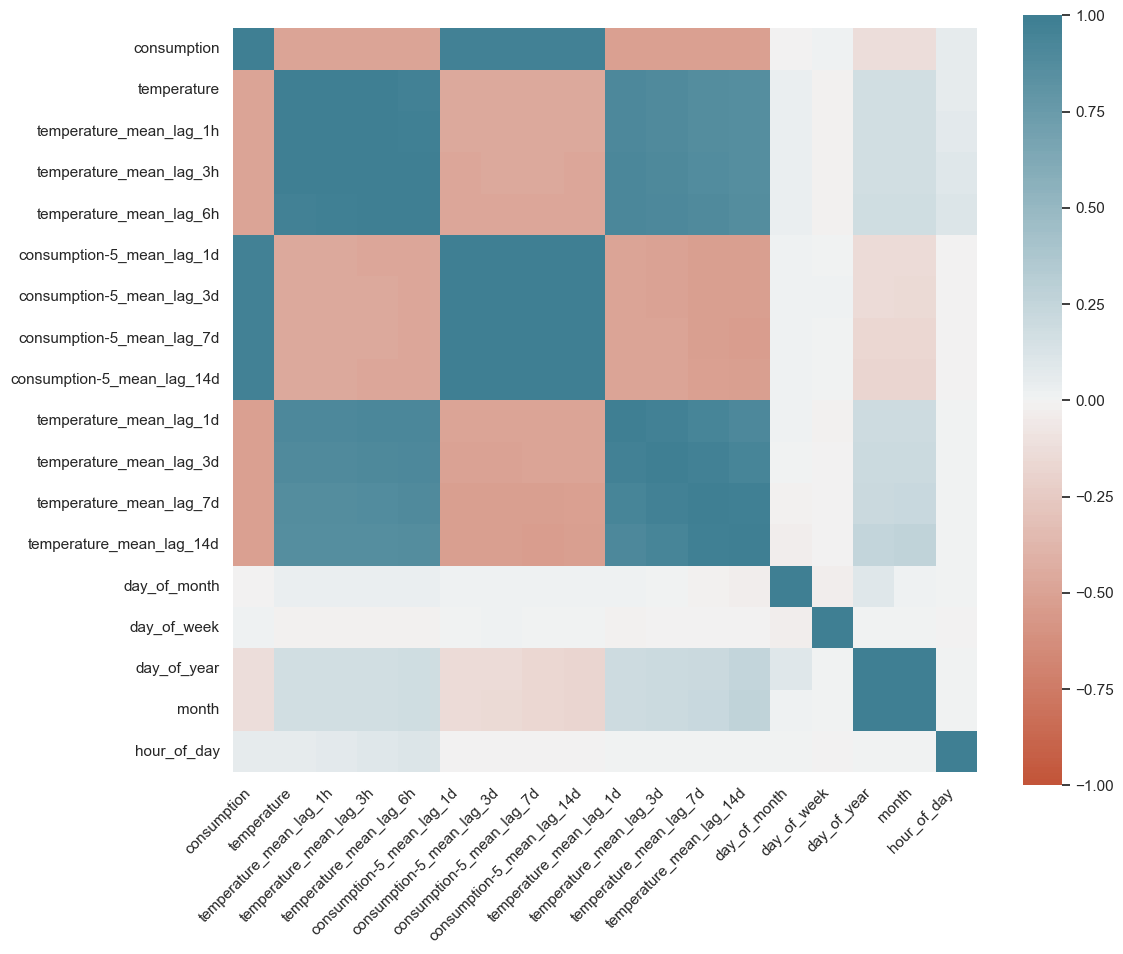

In [206]:
df = pd.get_dummies(df_full,columns=["location"])
df_cut = df_full.drop(columns=["location"])
move_cols = ["day_of_month","day_of_week","day_of_year","month","hour_of_day"]
temp = df_cut[move_cols]
df_cut = df_cut.drop(columns=temp)

df_cut = pd.concat([df_cut,temp],axis=1)

corr = df_cut.corr()
sns.set(rc={'figure.figsize':(12,10)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [203]:
corr

consumption  temperature  temperature_mean_lag_1h  \
consumption                    1.000000    -0.488698                -0.486819   
temperature                   -0.488698     1.000000                 0.995246   
temperature_mean_lag_1h       -0.486819     0.995246                 1.000000   
temperature_mean_lag_3h       -0.486244     0.986614                 0.996167   
temperature_mean_lag_6h       -0.487904     0.969625                 0.982987   
consumption-5_mean_lag_1d      0.975566    -0.468453                -0.468546   
consumption-5_mean_lag_3d      0.974617    -0.466668                -0.466705   
consumption-5_mean_lag_7d      0.973500    -0.466383                -0.466349   
consumption-5_mean_lag_14d     0.973010    -0.468480                -0.468414   
temperature_mean_lag_1d       -0.509344     0.911664                 0.913614   
temperature_mean_lag_3d       -0.511072     0.894296                 0.895673   
temperature_mean_lag_7d       -0.510093     0.872565                 0.873526   
temperature_mean_lag_14d      -0.508606     0.859508                 0.860006   
day_of_month                  -0.006511     0.033287                 0.032952   
day_of_week                    0.018469    -0.019532                -0.019553   
day_of_year                   -0.118760     0.178709                 0.178914   
month                         -0.120515     0.178456                 0.178688   
hour_of_day                    0.060728     0.050347                 0.077208   

                            temperature_mean_lag_3h  temperature_mean_lag_6h  \
consumption                               -0.486244                -0.487904   
temperature                                0.986614                 0.969625   
temperature_mean_lag_1h                    0.996167                 0.982987   
temperature_mean_lag_3h                    1.000000                 0.993764   
temperature_mean_lag_6h                    0.993764                 1.000000   
consumption-5_mean_lag_1d                 -0.469933                -0.473115   
consumption-5_mean_lag_3d                 -0.468022                -0.471086   
consumption-5_mean_lag_7d                 -0.467590                -0.470542   
consumption-5_mean_lag_14d                -0.469626                -0.472540   
temperature_mean_lag_1d                    0.918177                 0.927374   
temperature_mean_lag_3d                    0.899543                 0.907523   
temperature_mean_lag_7d                    0.876900                 0.884021   
temperature_mean_lag_14d                   0.862869                 0.869163   
day_of_month                               0.032713                 0.032239   
day_of_week                               -0.019616                -0.020039   
day_of_year                                0.179638                 0.181155   
month                                      0.179438                 0.181008   
hour_of_day                                0.099531                 0.116577   

                            consumption-5_mean_lag_1d  \
consumption                                  0.975566   
temperature                                 -0.468453   
temperature_mean_lag_1h                     -0.468546   
temperature_mean_lag_3h                     -0.469933   
temperature_mean_lag_6h                     -0.473115   
consumption-5_mean_lag_1d                    1.000000   
consumption-5_mean_lag_3d                    0.997958   
consumption-5_mean_lag_7d                    0.993748   
consumption-5_mean_lag_14d                   0.989072   
temperature_mean_lag_1d                     -0.492996   
temperature_mean_lag_3d                     -0.506414   
temperature_mean_lag_7d                     -0.526893   
temperature_mean_lag_14d                    -0.527872   
day_of_month                                 0.010860   
day_of_week                                  0.002956   
day_of_year                                 -0.143152  

In [ ]:
df.to_parquet("clean.parquet")
df.to_csv("clean.csv")